In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("car_dataset.csv")

In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any()
# null değer varmı kontrol ettik. 


Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


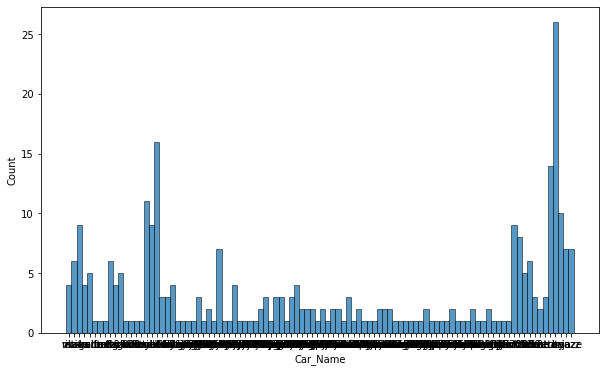

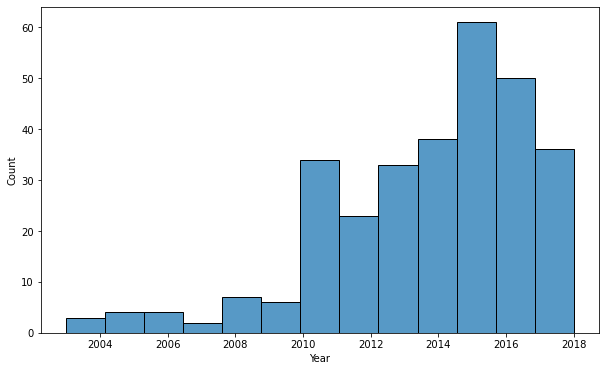

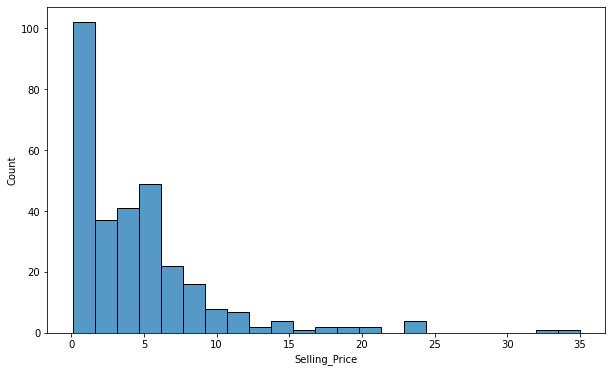

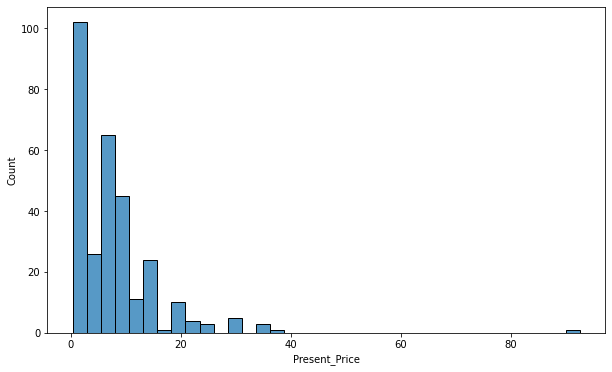

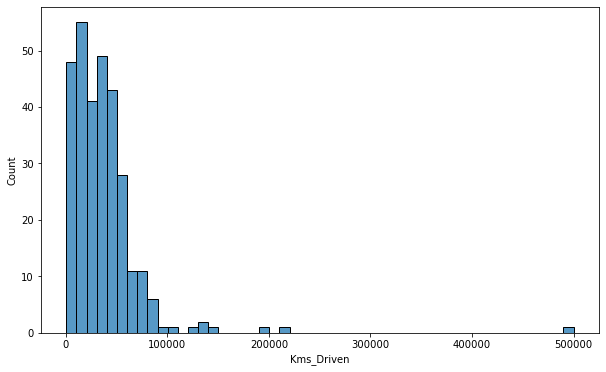

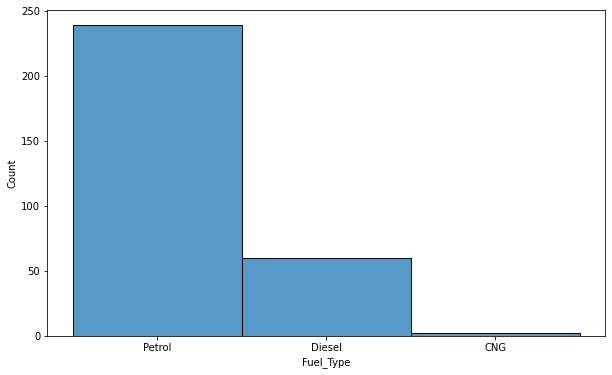

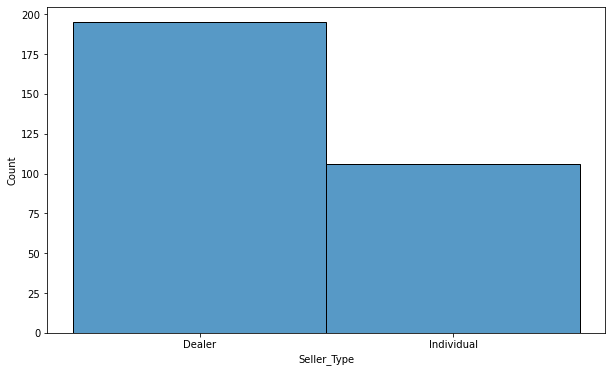

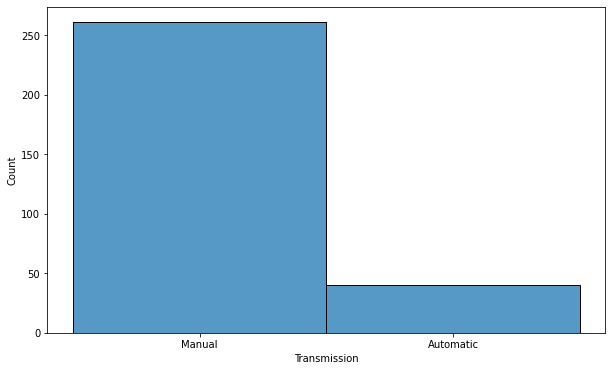

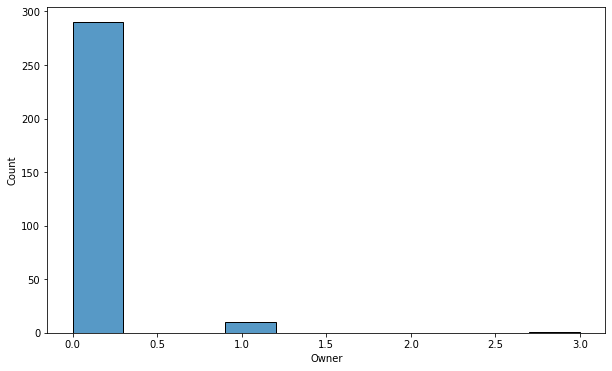

In [9]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

<AxesSubplot:>

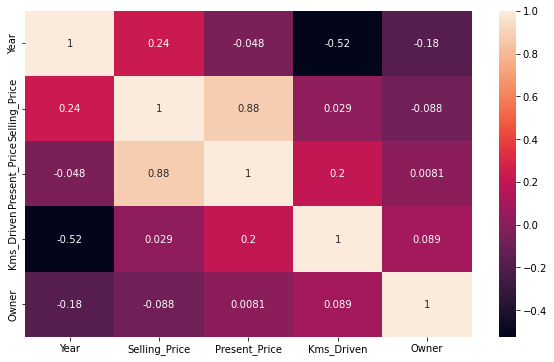

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
df['vehicle_age'] = 2021 - df['Year']

In [13]:
df.drop(columns=['Car_Name','Year'], inplace=True)

In [14]:
# kategorik değerleri sayısal ifadeye çeviriyoruz

In [15]:
df = pd.get_dummies(df,drop_first=True)

In [16]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [17]:
X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

In [18]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


In [24]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression(normalize=True).fit(X_train,y_train)

In [27]:
model.coef_

array([ 4.45257970e-01, -1.87067298e-05, -8.13577578e-01, -3.19047765e-01,
        2.61924627e+00,  6.06486867e-01, -1.22016745e+00, -1.00868282e+00])

In [30]:
pd.DataFrame(model.coef_,columns=['Coefficient'])

,Coefficient
0,0.445258
1,-0.000019
2,-0.813578
3,-0.319048
4,2.619246
5,0.606487
6,-1.220167
7,-1.008683


In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [32]:
y_pred = model.predict(X_test)


In [34]:
residuals = y_pred - y_test

In [35]:
residuals

67     1.457296
99     1.225207
266    0.780969
222   -0.086622
24    -0.350581
         ...   
25    -0.140542
181    0.365214
194   -1.950474
127    0.862086
161    0.236260
Name: Selling_Price, Length: 61, dtype: float64

In [36]:
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
mae=mean_absolute_error(y_test,y_pred)
R2_score=r2_score(y_test,y_pred)

print("Model testing performance:")
print("--------------------------")
print('RMSE is {:29}'.format(rmse))
print("MAE is {:30}".format(mae))
print('R2 score is {:26}'.format(R2_score))

Model testing performance:
--------------------------
RMSE is             1.946054013887484
MAE is             1.1811769157076821
R2 score is         0.8589039971923131


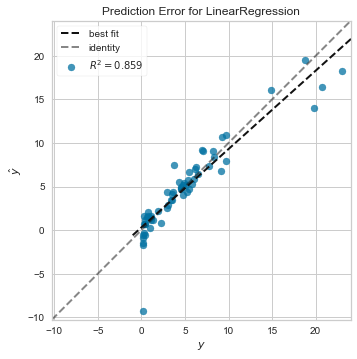

In [39]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
lm= LinearRegression(normalize=True)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [41]:
results = pd.DataFrame({'Actual': y_test, 'Predict':y_pred})
pd.DataFrame(results)

,Actual,Predict
67,9.25,10.707296
99,9.65,10.875207
266,3.65,4.430969
222,6.00,5.913378
24,2.90,2.549419
...,...,...
25,3.00,2.859458
181,0.30,0.665214
194,0.20,-1.750474
127,0.75,1.612086


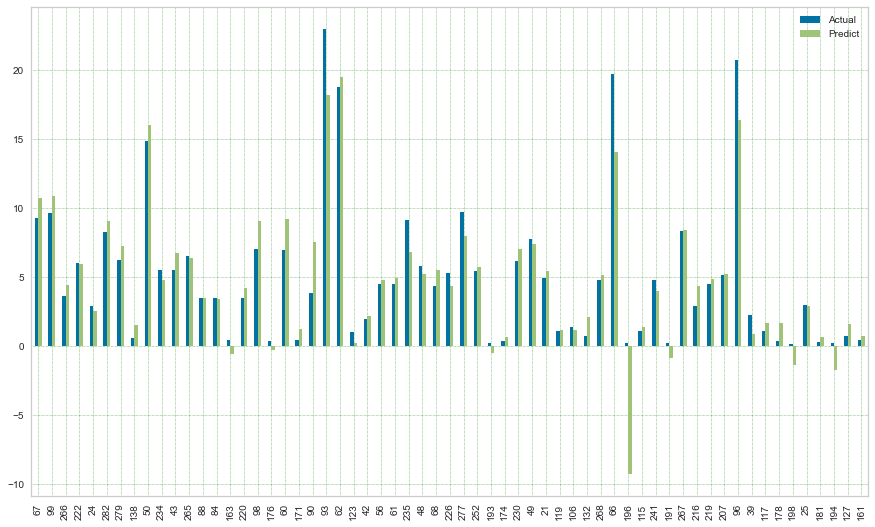

In [43]:
results.plot(kind='bar',figsize=(15,9))
plt.grid(linestyle=':', linewidth='0.5', color='green')
plt.show()

In [44]:
def show_metrics(y_test, y_pred):
    rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
    mae=mean_absolute_error(y_test,y_pred)
    R2_score=r2_score(y_test,y_pred)
    print("Model testing performance:")
    print("--------------------------")
    print('RMSE is {:29}'.format(rmse))
    print("MAE is {:30}".format(mae))
    print('R2 score is {:26}'.format(R2_score))

In [45]:
from sklearn.linear_model import Ridge,RidgeCV

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)

In [51]:
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE is            1.9026594573849411
MAE is             1.1854250171898173
R2 score is         0.8651263662232394


In [55]:
alpha_space = np.linspace(0.1, 20, 100)
alpha_space

ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [56]:
ridgecv.alpha_

0.1

In [57]:
alpha_space = np.linspace(0.001, 20, 100)
alpha_space

ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-03, 2.03010101e-01, 4.05020202e-01, 6.07030303e-01,
       8.09040404e-01, 1.01105051e+00, 1.21306061e+00, 1.41507071e+00,
       1.61708081e+00, 1.81909091e+00, 2.02110101e+00, 2.22311111e+00,
       2.42512121e+00, 2.62713131e+00, 2.82914141e+00, 3.03115152e+00,
       3.23316162e+00, 3.43517172e+00, 3.63718182e+00, 3.83919192e+00,
       4.04120202e+00, 4.24321212e+0...
       1.53537677e+01, 1.55557778e+01, 1.57577879e+01, 1.59597980e+01,
       1.61618081e+01, 1.63638182e+01, 1.65658283e+01, 1.67678384e+01,
       1.69698485e+01, 1.71718586e+01, 1.73738687e+01, 1.75758788e+01,
       1.77778889e+01, 1.79798990e+01, 1.81819091e+01, 1.83839192e+01,
       1.85859293e+01, 1.87879394e+01, 1.89899495e+01, 1.91919596e+01,
       1.93939697e+01, 1.95959798e+01, 1.97979899e+01, 2.00000000e+01]),
        cv=10)

In [58]:
ridgecv.alpha_

0.203010101010101

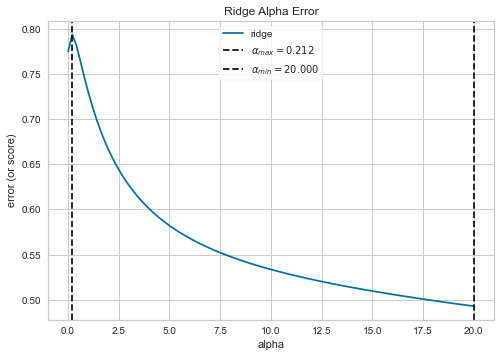

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [60]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.01, 20, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [61]:
y_pred = ridgecv.predict(X_test)

In [62]:
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE is            1.8207105952668252
MAE is             1.1384965344475775
R2 score is         0.8764943660724134


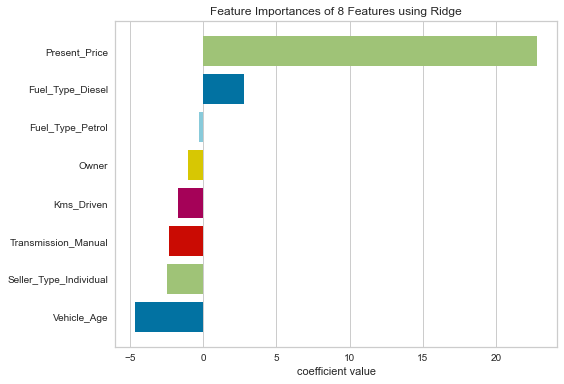

<AxesSubplot:title={'center':'Feature Importances of 8 Features using Ridge'}, xlabel='coefficient value'>

In [63]:
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

# en önemli future lar

In [64]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE is             4.844430603529284
MAE is              3.198316612453816
R2 score is        0.12563974476813822


In [69]:
alpha_space = np.linspace(0.001, 10, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10).fit(X_train, y_train)

In [72]:
y_pred = lasso_cv_model.predict(X_test)

In [73]:
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE is            1.9323214066935657
MAE is              1.172668171262711
R2 score is         0.8608882992084925
